## Attribute distribution

In this notebook we use plots to visualize the distributions of certain attributes as the potential candidates. By analyzing the distribution we can detect various anomalies including **missing or invalid data**.

### Libraries

At the very beginning we import all required libraries we are going to need within this notebook.

In [7]:
import sys
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading downloaded dataset

First, we load the dataset which was downloaded and stored in

```bash

    ./data/interim/imbd/processed_movies.csv

```

In [5]:
# Get the current notebook's directory
PROJECT_ROOT = Path(os.getcwd()).parent  # Assuming 'notebooks/' is inside the project root

# Add it to sys.path
sys.path.append(str(PROJECT_ROOT))

# Now you can import your config module
import isa_project_1.config as config

print("opening dataset...")
# here we read the respective output file where the dataset was stored 
movie_df = pd.read_csv(config.DATASETS['tmdb_5000_movies.csv'])
print("success!")

print("printing basic info about columns and some of the content...")
# Basic structure of the dataset
print(movie_df.info())   # Column types & missing values
print(movie_df.head())   # First few rows
print(movie_df.tail())   # Last few rows

opening dataset...
success!
printing basic info about columns and some of the content...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-nul

### Checking dataset structure

The next step is to examine the overall structure to understand the dataset's contents.

In [6]:
# Basic structure of the dataset
print(movie_df.info())   # Column types & missing values
print(movie_df.head())   # First few rows
print(movie_df.tail())   # Last few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Attribute distribution analysis

In this section we will analyze the distributions of some relevant attributes.


#### Budget

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


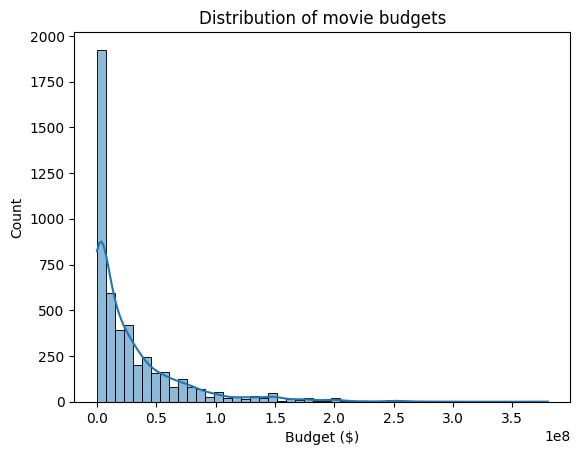

In [44]:
print(movie_df['budget'].describe())
sns.histplot(movie_df['budget'], bins=50, kde=True)
plt.title("Distribution of movie budgets")
plt.xlabel("Budget ($)")
plt.show()

In the graph we can see that many movies have their budget set to 0. This can be due to missing data. We can also note that most of the movies have the budget lower than $100.000.000.

#### Popularity

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64


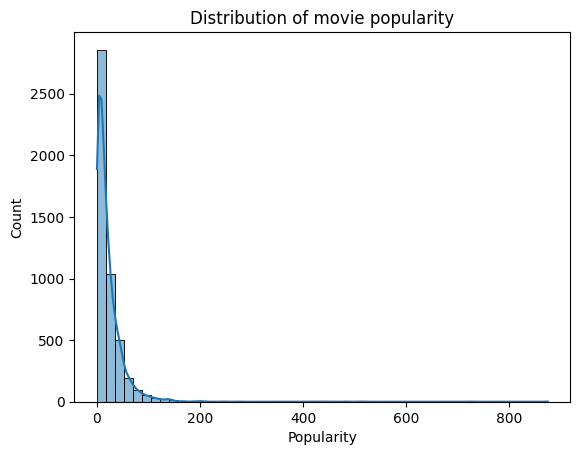

In [47]:
print(movie_df['popularity'].describe())
sns.histplot(movie_df['popularity'], bins=50, kde=True)
plt.title("Distribution of movie popularity")
plt.xlabel("Popularity")
plt.show()

From the graph we can see that the curve is heavily right-scewed which means some movies are highly popular. As in previous example most movies have popularity close to 0.

#### Revenue

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64


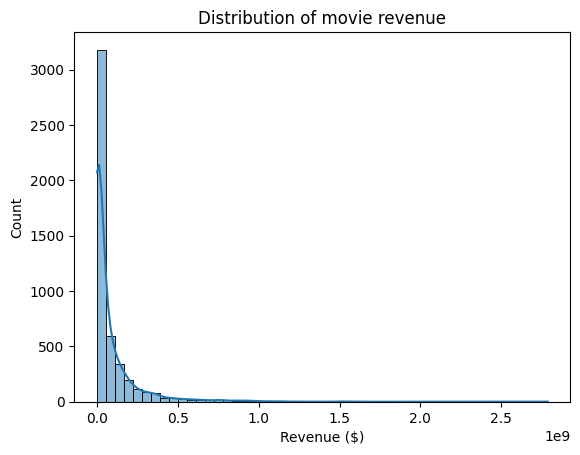

In [51]:
print(movie_df['revenue'].describe())
sns.histplot(movie_df['revenue'], bins=50, kde=True)
plt.title("Distribution of movie revenue")
plt.xlabel("Revenue ($)")
plt.show()

From the above distribution we can see that many movies have set their budget to 0 which is not valid data.

#### Runtime

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64


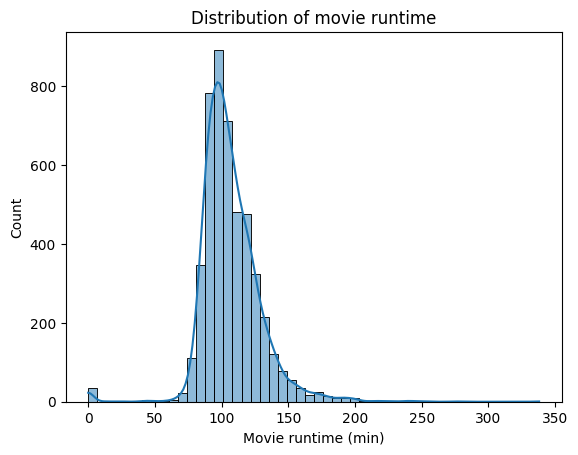

In [63]:
print(movie_df['runtime'].describe())
sns.histplot(movie_df['runtime'], bins=50, kde=True)
plt.title("Distribution of movie runtime")
plt.xlabel("Movie runtime (min)")
plt.show()

From the plot above we can see that most of the movies have the runtime ranging between 80-150 minutes. Some of the movies have runtime set to 0 - invalid or missing data.

#### Vote average

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64


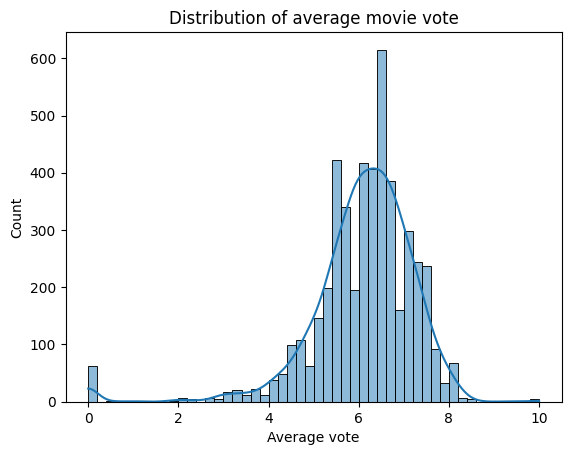

In [66]:
print(movie_df['vote_average'].describe())
sns.histplot(movie_df['vote_average'], bins=50, kde=True)
plt.title("Distribution of average movie vote")
plt.xlabel("Average vote")
plt.show()

From the graph above we can see that most of the movies have the average vote between 5 and 7. Only a few movies have vote higher than 9.

#### Vote count

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64


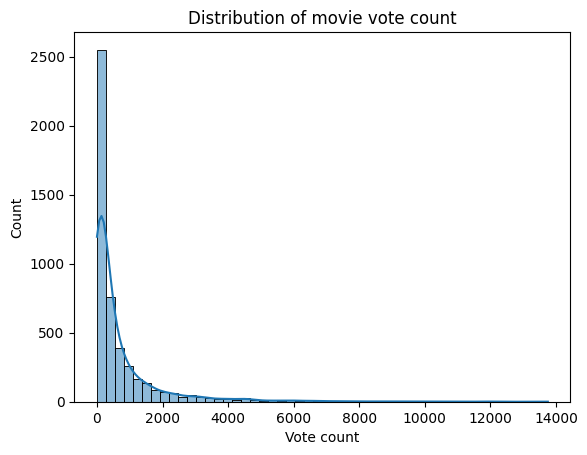

In [69]:
print(movie_df['vote_count'].describe())
sns.histplot(movie_df['vote_count'], bins=50, kde=True)
plt.title("Distribution of movie vote count")
plt.xlabel("Vote count")
plt.show()

From the distribution we can see that there are some movies with exremely high vote count. A majority of movies, however, have the the count lower than 10.

#### Production companies

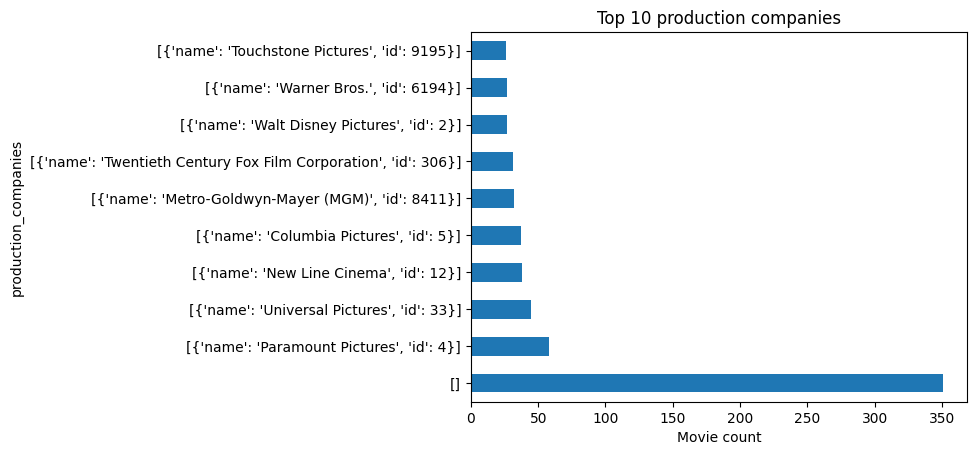

In [94]:
movie_df['production_companies'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 production companies")
plt.xlabel("Movie count")
plt.show()

From the distribution above we can see that Universal Pictures, New Line Cinema and Columbia Pictures have the most movies. However the vast majority of the movies doesn't have any production company. 

#### Genre

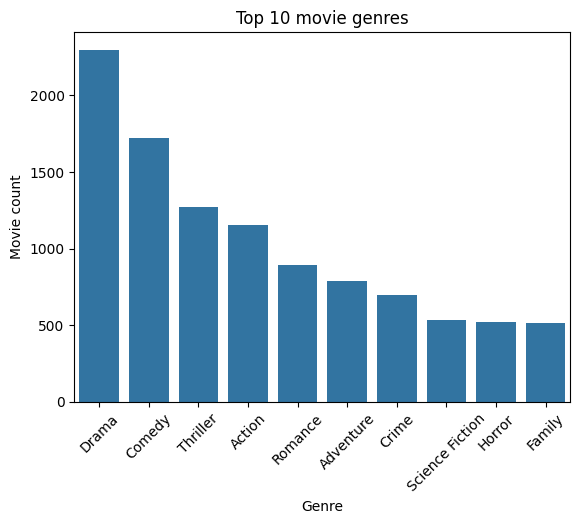

In [97]:
from collections import Counter
import ast

genres_list = movie_df['genres'].dropna().apply(lambda x: [g['name'] for g in ast.literal_eval(x)]).explode()
top_genres = Counter(genres_list).most_common(10)

genres, counts = zip(*top_genres)
sns.barplot(x=list(genres), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 10 movie genres")
plt.xlabel("Genre")
plt.ylabel("Movie count")
plt.show()

From the distribution above we can see that most popular movie genres are drama, comedy and thriller. 

#### Language

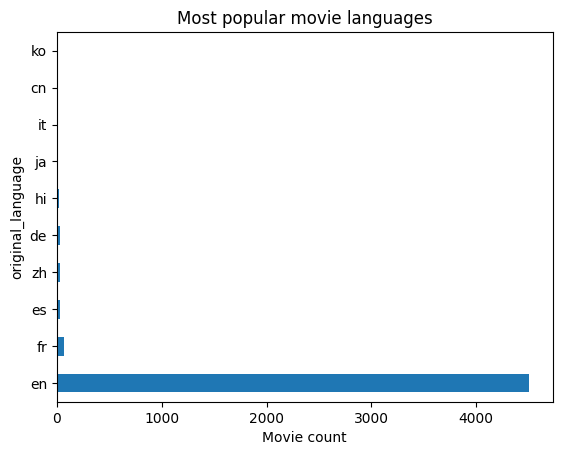

In [8]:
movie_df['original_language'].value_counts().head(10).plot(kind='barh')
plt.title("Most popular movie languages")
plt.xlabel("Movie count")
plt.show()

From the distribution above we can see that in this dataset the english movies dominate.